## Task 2 K Means Clustering

data shape (250, 2)
initial center  [[-0.82536192  0.65367423]
 [ 1.41451733 -0.44932467]
 [ 2.8278529  -1.01201554]]
iteration 10
[[-0.45150538  0.16733466]
 [ 0.94254383 -0.62905498]
 [ 1.50209148  0.54745453]]
iteration 20
[[-0.43983907  0.16050461]
 [ 0.96072271 -0.64988568]
 [ 1.49570393  0.53910492]]
iteration 30
[[-0.43983907  0.16050461]
 [ 0.96072271 -0.64988568]
 [ 1.49570393  0.53910492]]
iteration 40
[[-0.43983907  0.16050461]
 [ 0.96072271 -0.64988568]
 [ 1.49570393  0.53910492]]
iteration 50
[[-0.43983907  0.16050461]
 [ 0.96072271 -0.64988568]
 [ 1.49570393  0.53910492]]


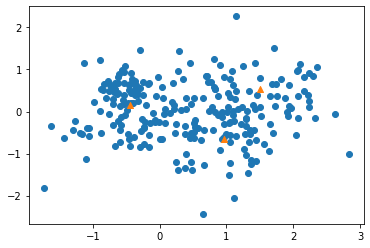

In [1]:
import numpy as np
from matplotlib import pyplot as plt


def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]


def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)


def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest == k].mean(axis=0) for k in range(centroids.shape[0])])


def main_km():
    points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                        (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                        (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

    print(r'data shape', points.shape)
    c = initialize_centroids(points, 3)
    print(r'initial center ', c)
    for i in range(50):
        closest_centroid(points, c)
        c = move_centroids(points, closest_centroid(points, c), c)
        if (i+1) % 10 == 0:
            print("iteration %d" % (i+1))
            print(c)

    plt.scatter(points[:, 0], points[:, 1])
    plt.scatter(c[:, 0], c[:, 1], marker='^')
    plt.show()


if __name__ == '__main__':
    main_km()

#### T2-Part A: Understanding K-Means Clustering Algorithm 
In this exercise, you will be manually running k-means algorithm on a toy dataset.  
Consider that you are given a 8 data samples as: R1 (185, 72), R2 (170,56), R3 (168,60), R4 (179,68), R5 (182,72), 
R6 (188,77), R7 (180,71), and R8 (180,70) and two initial clusters as C1 (185,72) and C2 (170,56).   
Q 1: Assign each of data sample (e.g., data rows) to one of the two clusters.   
Q 2: Estimate the cluster centroids after each row assignment.  


In [11]:
points = (185, 72),(170,56),(168,60),(179,68),(182,72),(188,77),(180,71),(180,70)
x1, x2 = zip(*points)
x1 = list(x1)
x2 = list(x2)
x1, x2

([185, 170, 168, 179, 182, 188, 180, 180], [72, 56, 60, 68, 72, 77, 71, 70])

In [15]:
centers = [[185,72], [170,56]]

In [25]:
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
#     print(compare_to_first_center, compare_to_second_center)
    class_of_points = compare_to_first_center > compare_to_second_center
    return class_of_points

In [27]:
assignedMembers = assign_members(x1, x2, centers)
np.where(assignedMembers, 'C2', 'C1')

array(['C1', 'C2', 'C2', 'C1', 'C1', 'C1', 'C1', 'C1'], dtype='<U2')

In [22]:
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

In [23]:
number_of_iterations = 4
for i in range(number_of_iterations):
    class_of_points = assign_members(x1, x2, centers)
    print(class_of_points)
    centers = update_centers(x1, x2, class_of_points)
    print(centers)

[ 2.68741925 19.93879524 18.4812217   4.95535625  0.47140452  7.78174502
  2.4267033   2.86744176] [21.26029163  2.23606798  2.23606798 14.14213562 19.10497317 26.87005769
 17.02938637 16.2788206 ]
[False  True  True False False False False False]
[[182.33333333333334, 71.66666666666667], [169.0, 58.0]]
[ 2.68741925 19.93879524 18.4812217   4.95535625  0.47140452  7.78174502
  2.4267033   2.86744176] [21.26029163  2.23606798  2.23606798 14.14213562 19.10497317 26.87005769
 17.02938637 16.2788206 ]
[False  True  True False False False False False]
[[182.33333333333334, 71.66666666666667], [169.0, 58.0]]
[ 2.68741925 19.93879524 18.4812217   4.95535625  0.47140452  7.78174502
  2.4267033   2.86744176] [21.26029163  2.23606798  2.23606798 14.14213562 19.10497317 26.87005769
 17.02938637 16.2788206 ]
[False  True  True False False False False False]
[[182.33333333333334, 71.66666666666667], [169.0, 58.0]]
[ 2.68741925 19.93879524 18.4812217   4.95535625  0.47140452  7.78174502
  2.4267033 

### T2-Part B: Implementing K-Means Clustering Algorithm 
Write a code for k-means clustering algorithm in the provided file. Initialize random points, and  
then write three major functions for KMeans clustering including initializing random centroids,   
assign each data sample to initialized centroids, and then update centroids.  
#### Step 1: Initialize Random Points   
import numpy as np  
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),  
 (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),  
 (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))  
#### Step 2: Initializing random centroids   
Write your code in the provided file.   
#### Step 3: Assign each data sample to initialized centroids   
Write your code in the provided file.   
#### Step 4: Update centroids   
Write your code in the provided file.  
#### Step 5: show the points and the learned centroids after 50 iteration.  
plt.scatter(points[:, 0], points[:, 1])  
plt.scatter(c[:, 0], c[:, 1], marker='^')  
plt.show()  

In [29]:
import numpy as np
points = np.vstack((
    (np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
    (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
    (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))
))

In [30]:
points

array([[ 9.22979471e-01,  3.94892480e-01],
       [ 6.37317114e-01, -4.10534316e-01],
       [ 3.01818348e-02, -8.90736197e-01],
       [ 2.63908391e-01, -1.10157466e+00],
       [ 1.32871211e+00, -2.42403010e-01],
       [ 1.55614552e+00, -1.73353244e+00],
       [ 8.25841969e-01,  2.55175848e-02],
       [ 3.10552357e-01, -6.61918758e-01],
       [ 1.02128619e+00,  1.54678310e+00],
       [ 8.32765235e-02, -3.30162414e-01],
       [ 9.79063109e-02,  1.06180244e+00],
       [ 2.43675530e+00,  1.61072499e-02],
       [ 6.14171291e-01, -9.12367501e-01],
       [ 1.50787099e+00,  7.29899629e-01],
       [ 1.53410363e+00,  2.65454964e-01],
       [ 2.65009963e-01, -6.14921302e-01],
       [ 2.14498921e+00,  3.57956771e-01],
       [ 2.46484446e+00, -9.18076337e-01],
       [ 1.45210687e+00, -8.23324739e-01],
       [ 1.55552635e+00, -7.21703251e-01],
       [ 1.61225887e+00,  4.83454878e-03],
       [ 6.18716013e-01,  2.14379704e-01],
       [ 1.10207831e+00, -1.08066766e+00],
       [ 2.

In [32]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
k = 3
centroids = initialize_centroids(points, k)
centroids

array([[ 0.90045003,  0.74724426],
       [-0.61474053,  0.34104494],
       [-0.31119384,  0.62234454]])

In [46]:
centroids.shape[0]

3

In [43]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    return np.argmin(distances, axis=0)

closest = closest_centroid(points, centroids)
closest

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1], dtype=int64)

In [47]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    updatedCenters = [ points[closest == k].mean(axis=0) for k in range(centroids.shape[0])]
    return np.array(updatedCenters)

In [49]:
c = move_centroids(points, closest, centroids)
c

array([[ 1.24145845,  0.12297355],
       [-0.51890539, -0.21769932],
       [-0.17553381,  0.56469187]])

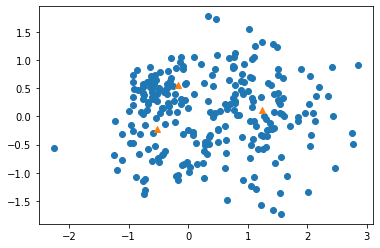

In [50]:
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(c[:, 0], c[:, 1], marker='^')
plt.show()

In [53]:
import numpy as np

In [79]:
points = (1, 0),(1,2),(3,0),(2,2)
x1, x2 = zip(*points)
x1 = list(x1)
x2 = list(x2)
x1, x2

([1, 1, 3, 2], [0, 2, 0, 2])

In [80]:
centers = [[2,3], [2,-1]]

In [81]:
def assign_members(x1, x2, centers):
    print(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    print(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    print(compare_to_first_center, compare_to_second_center)
    class_of_points = compare_to_first_center > compare_to_second_center
    return class_of_points

In [82]:
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

In [83]:
assignedMembers = assign_members(x1, x2, centers)
np.where(assignedMembers, 'C2', 'C1')

[10  2 10  1]
[ 2 10  2  9]
[3.16227766 1.41421356 3.16227766 1.        ] [1.41421356 3.16227766 1.41421356 3.        ]


array(['C2', 'C1', 'C2', 'C1'], dtype='<U2')

In [84]:
centers = update_centers(x1, x2, assignedMembers)
centers

[[1.5, 2.0], [2.0, 0.0]]

In [85]:
assignedMembers = assign_members(x1, x2, centers)
np.where(assignedMembers, 'C2', 'C1')

[4.25 0.25 6.25 0.25]
[1. 5. 1. 4.]
[2.06155281 0.5        2.5        0.5       ] [1.         2.23606798 1.         2.        ]


array(['C2', 'C1', 'C2', 'C1'], dtype='<U2')

In [86]:
update_centers(x1, x2, assignedMembers)

[[1.5, 2.0], [2.0, 0.0]]

In [90]:
centers = [[0,1], [3,2]]

In [91]:
assignedMembers = assign_members(x1, x2, centers)
np.where(assignedMembers, 'C2', 'C1')

[ 2  2 10  5]
[8 4 4 1]
[1.41421356 1.41421356 3.16227766 2.23606798] [2.82842712 2.         2.         1.        ]


array(['C1', 'C1', 'C2', 'C2'], dtype='<U2')

In [92]:
centers = update_centers(x1, x2, assignedMembers)
centers

[[1.0, 1.0], [2.5, 1.0]]

In [93]:
assignedMembers = assign_members(x1, x2, centers)
np.where(assignedMembers, 'C2', 'C1')

[1. 1. 5. 2.]
[3.25 3.25 1.25 1.25]
[1.         1.         2.23606798 1.41421356] [1.80277564 1.80277564 1.11803399 1.11803399]


array(['C1', 'C1', 'C2', 'C2'], dtype='<U2')

In [94]:
update_centers(x1, x2, assignedMembers)

[[1.0, 1.0], [2.5, 1.0]]